# Modelos de regresión (predicción)

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ymeza@ubiobio.cl

**Fecha de Creación:** Septiembre de 2024  
**Versión:** 1.0  

---

## Descripción

Este notebook muestra la creación de modelos predictivos usando algoritmos de regresión.

Los algoritmos revisados son:

+ LineaRegression
+ DecisionTreeeRegressor
+ RandomForest

Se revisan varias alternativas de transformación de las variables categóricas:

+ Generación de variables dummies de forma manual.
+ Uso del método get_dummies disponible en pandas.
+ Uso de LabelEncoder.
+ Uso de OneHotEncoder.
+ Uso de Target Encoding.
+ Uso de Frequency Encoding.
+ Uso de Ordinal Encoding.

Cada modelo predictivo generado pasa por 3 pasos:
+ Creación
+ Entrenamiento
+ Evaluación (cálculo de métricas)
+ Realización de predicciones

Las métricas usadas en regresión son:

+ MAE (*mean squared error*)
+ MSLE (*mean squared log error*)
---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)
- sklearn (1.3.2)

Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de sklearn usas:

```bash
import sklearn
print(sklearn.__version__)
```

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ELsvhb3RqyZS8phHxo6a3A.png)

# Fase 1 : Comprender el negocio

De Beers es la Compañia de diamantes más grande del mundo.
De Beers necesita saber el precio de mercado actualizado (en
dólares estadounidenses) de cualquier diamante que venda.

Se necesita crear un modelo que prediga, con un alto nivel de
precisión, el precio de mercado en dólares estadounidenses de un
diamante al relacionar los precios de los diamantes vendidos
anteriormente.


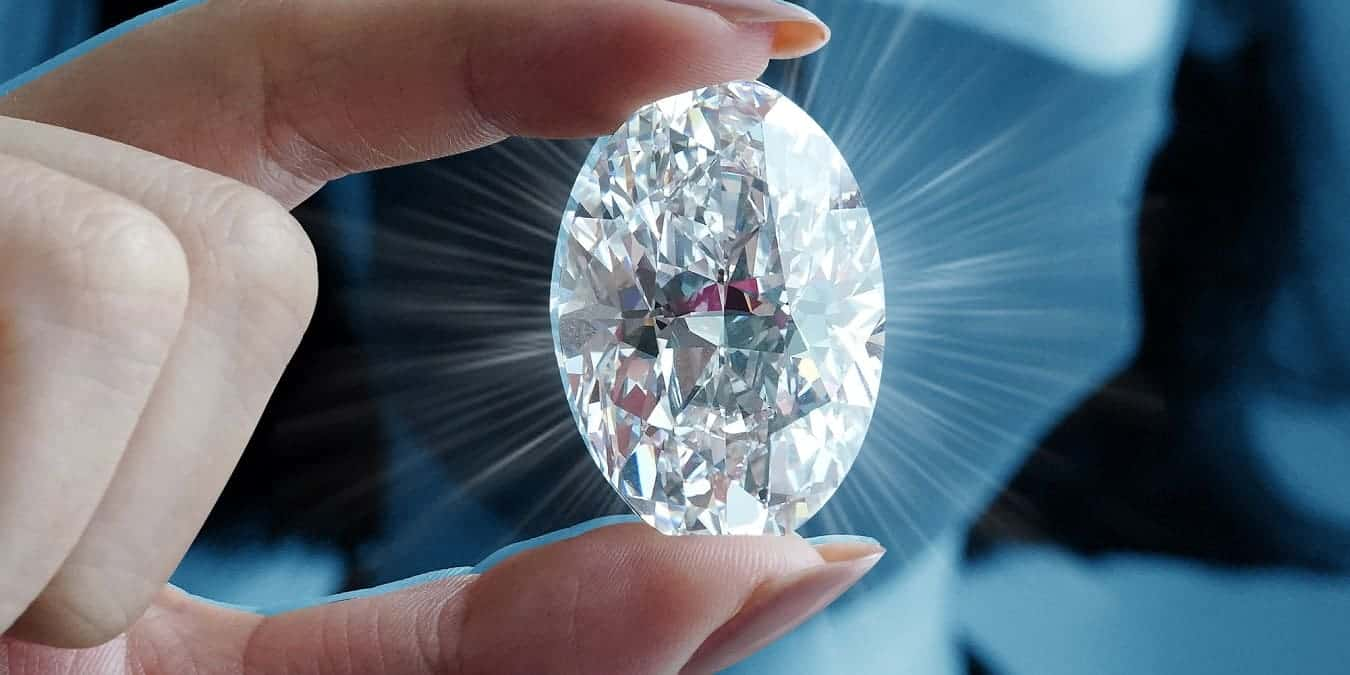

In [117]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [8]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/Diamonds.csv

--2024-09-22 16:09:06--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/Diamonds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3192560 (3.0M) [text/plain]
Saving to: ‘Diamonds.csv’

Diamonds.csv        100%[===================>]   3.04M  --.-KB/s    in 0.06s   

2024-09-22 16:09:07 (49.8 MB/s) - ‘Diamonds.csv’ saved [3192560/3192560]



***Features:***

+ carat (carat weight of the diamond)
+ cut (cut quality of the cut)
+ color (color diamond color)
+ clarity (clarity a measurement of how clear the diamond is)
+ x (length in mm)
+ y (width in mm)
+ z (depth in mm)
+ depth (total depth percentage = z / mean(x, y))
+ table (width of top of diamond relative to widest point)

In [123]:
# **
# Leer el archivo Diamonds.csv
#
data = pd.read_csv("Diamonds.csv", sep=",")

# Fase 2 : Comprender los datos

In [11]:
# Obtener la cantidad de filas y columnas (observaciones y características de los datos)
data.shape

(53940, 11)

In [ ]:
# Nombre de las columnas
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
# Obtiene las primeras 5 observaciones
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Obtiene detalles de las columnas (características de los diamantes)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# Obtiene la cantidad de regostros con valores nulos
data.isna().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [12]:
# Usaremos un método resumen de estadísticas numéricas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


+ Las filas de conteo, media, mínimo y máximo se explican por sí mismas.
+ El std muestra la desviación estándar y las filas 25%, 50% y 75% muestran los percentiles correspondientes.

In [124]:
# Elimina las columnas con cero aporte analítico
df_final = data.drop(['Unnamed: 0'],axis=1)

In [14]:
df_final.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [15]:
# Obtiene la correlación de las variables con el precio del diamante (la variable que se pretende predecir)
corr_matrix = df_final[df_final.describe().columns].corr()
corr_matrix["price"].sort_values(ascending=False)

,price
price,1.000000
carat,0.921591
x,0.884435
y,0.865421
z,0.861249
table,0.127134
depth,-0.010647


In [16]:
# Obtiene registros que incumplen con reglas naturales del negocio
df_final.query('x==0 or y==0 or z==0')

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


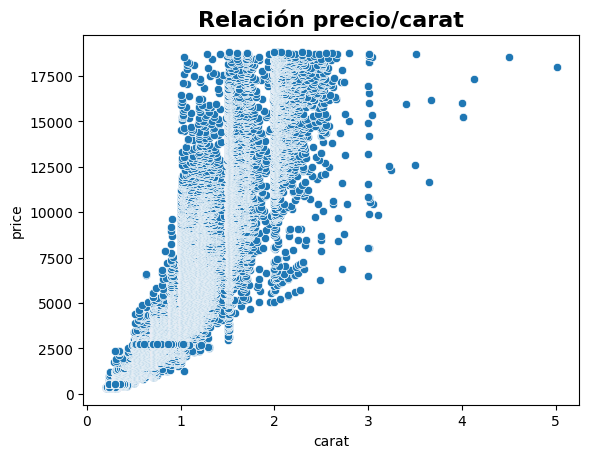

In [ ]:
sb.scatterplot(x=df_final.carat , y=df_final.price)
plt.title("Relación precio/carat", fontsize=16, fontweight="bold")
plt.show()

In [ ]:
len(df_final.query('carat>3'))

32

In [ ]:
len(df_final.query('carat>2'))

1889

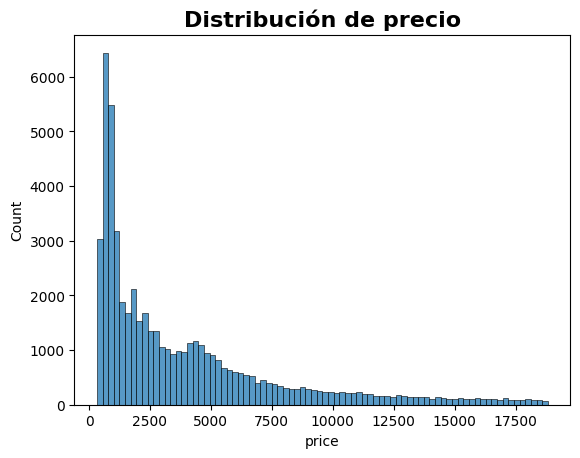

In [ ]:
sb.histplot(df_final.price)
plt.title("Distribución de precio", fontsize=16, fontweight="bold")
plt.show()

# Fase 3 : Preparar los datos

## Tratamiento de valores atípicos (ouliers)

In [17]:
# Identificación de los registros
df_final.query('z>10 or y>10')

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


In [18]:
# Obtiene los índices donde están ubicados los atípicos
df_final.query('z>10 or y>10').index

Index([24067, 25998, 27415, 27630, 48410, 49189], dtype='int64')

In [125]:
# Eliminación
df_final.drop(df_final.query('z>10 or y>10').index, inplace=True)

In [88]:
# Diamantes con su dimensión en cero
df_final.query('x==0 or y==0 or z==0')

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [89]:
df_final.query('x==0 or y==0 or z==0').index

Index([ 2207,  2314,  4791,  5471, 10167, 11182, 11963, 13601, 15951, 24394,
       24520, 26123, 26243, 27112, 27429, 27503, 27739, 49556, 49557, 51506],
      dtype='int64')

In [126]:
df_final.drop(df_final.query("x==0 or y==0 or z==0").index, inplace=True)

In [23]:
df_final.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Cálculo de volumen del diamante

In [127]:
# Cálculo de volumen
df_final["vol"] = df_final.x * df_final.y * df_final.z
df_final.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,vol
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [128]:
df_final.drop(["x","y","z"], axis=1, inplace=True)
df_final.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


## Tratamiento de variables categóricas

In [94]:
df_final.describe(include = np.object_)

,cut,color,clarity
count,53914,53914,53914
unique,5,7,8
top,Ideal,G,SI1
freq,21547,11284,13063


In [129]:
# Respalda el data frame limpio original para poder experimentar con las técnicas de transformación
original_dt_final = df_final.copy()

### Alternativa 0 - Uso de get_dummies de forma 'manual'

Esta técnica transforma cada categoría asignada de forma manual por el analista.


In [130]:
# Creación de variables Dummy
df_final.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [132]:
df_final.cut.replace({"Ideal":5, "Premium":4, "Good":2, "Very Good":3, "Fair":1}, inplace=True)
df_final.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,5,E,SI2,61.5,55.0,326,38.202030
1,0.21,4,E,SI1,59.8,61.0,326,34.505856
2,0.23,2,E,VS1,56.9,65.0,327,38.076885
3,0.29,4,I,VS2,62.4,58.0,334,46.724580
4,0.31,2,J,SI2,63.3,58.0,335,51.917250


In [133]:
df_final.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [134]:
df_final.color.replace({"E":2, "I":6, "J":7, "H":5, "F":3, "G":4, "D":1}, inplace=True)
df_final.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,5,2,SI2,61.5,55.0,326,38.202030
1,0.21,4,2,SI1,59.8,61.0,326,34.505856
2,0.23,2,2,VS1,56.9,65.0,327,38.076885
3,0.29,4,6,VS2,62.4,58.0,334,46.724580
4,0.31,2,7,SI2,63.3,58.0,335,51.917250


In [135]:
df_final.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [136]:
df_final.clarity.replace({"SI2":1, "SI1":2, "VS1":3, "VS2":4, "VVS2":5, "VVS1":6, "I1":7, "IF":8}, inplace=True)
df_final.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,5,2,1,61.5,55.0,326,38.202030
1,0.21,4,2,2,59.8,61.0,326,34.505856
2,0.23,2,2,3,56.9,65.0,327,38.076885
3,0.29,4,6,4,62.4,58.0,334,46.724580
4,0.31,2,7,1,63.3,58.0,335,51.917250


In [138]:
# Guarda la data usando esta alternativa de transformación
dt_final_dummies_manual = df_final.copy()

### Alternativa 1 - Uso de get_dummies

El método *get_dummies* de *pandas* se utiliza para convertir variables categóricas en variables dummy o indicadoras, transformando cada categoría en una columna binaria (0 o 1). Este método es útil para preparar datos categóricos para modelos de aprendizaje automático que no pueden trabajar con datos categóricos directamente.

In [98]:
# Recupera la versión original de los datos
df_final = original_dt_final

In [99]:
categorical_features = df_final.describe(include = np.object_).columns
categorical_features

Index(['cut', 'color', 'clarity'], dtype='object')

In [100]:
# Aplicamos get_dummies a las columnas categóricas
df_dummies = pd.get_dummies(df_final, columns=categorical_features)
df_dummies

,carat,depth,table,price,vol,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,38.202030,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,34.505856,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,38.076885,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,46.724580,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,51.917250,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,115.920000,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,118.110175,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,114.449728,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,140.766120,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False




---


**Desventajas del uso de get_dummies**


---



**Aumento de la dimensionalidad**

Cada categoría única se convierte en una columna separada, lo que puede generar un aumento considerable en el número de columnas si se tienen variables categóricas con muchas categorías. Esto se conoce como el problema de la dimensionalidad, y puede ralentizar el entrenamiento de modelos y consumir más memoria,


**Colinealidad**

Cuando se crea una columna dummy por cada categoría, las nuevas variables están completamente correlacionadas entre sí. Por ejemplo, si se tiene Género_Femenino y Género_Masculino, una de estas columnas es redundante porque su valor se puede deducir de la otra. Esto introduce colinealidad, lo que puede afectar a algunos modelos (como la regresión lineal) que son sensibles a variables altamente correlacionadas.

La solución para evitar la colinealidad: se puede eliminar una de las columnas dummy utilizando el parámetro drop_first=True en get_dummies, lo que elimina la primera categoría de cada conjunto de variables dummy.

**No captura la relación ordinal entre categorías**

get_dummies trata todas las categorías de forma independiente, lo cual es apropiado para variables nominales (sin orden), pero no para variables categóricas con un orden natural (como Bajo, Medio, Alto). En estos casos, el uso de variables dummy puede perder información sobre la relación entre las categorías. Para variables ordinales, es mejor utilizar encoding ordinal.

**Desafíos con nuevas categorías durante predicciones**

Al aplicar get_dummies en el conjunto de entrenamiento y se encuentra una nueva categoría en los datos de prueba o predicción que no estaba presente en el conjunto de entrenamiento, el modelo no tendrá una columna dummy correspondiente para esa nueva categoría, lo que puede causar errores o resultados incorrectos.

La solución al problema anterior es mantener un conjunto fijo de categorías en todas las transformaciones o utilizar técnicas más avanzadas como OneHotEncoder de sklearn con el parámetro handle_unknown='ignore'.

### Alternativa 2 - Uso de LabelEncoder

Esta técnica asigna un número entero a cada categoría de la variable categórica. Es útil para variables ordinales (que tienen un orden natural), sin embargo, no se recomienda para variables nominales, ya que los números podrían implicar una relación de orden que no existe.

**Ventajas:**
+ Es simple y funciona bien cuando hay un orden natural en las categorías (variables ordinales).

**Desventajas:**
+ No es adecuada para variables nominales (sin orden), ya que puede inducir a los modelos a pensar que hay una relación numérica entre las categorías.

In [101]:
# Recupera la versión original de los datos
df_final = original_dt_final
# Obtiene las columnas a codificar
categorical_features = df_final.describe(include = np.object_).columns

In [103]:
# Usamos LabelEncoder
le = LabelEncoder()
for feature in categorical_features:
  df_final[f'{feature}_codificado'] = le.fit_transform(df_final[feature])

In [104]:
df_final.head()

,carat,cut,color,clarity,depth,table,price,vol,cut_codificado,color_codificado,clarity_codificado
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030,2,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856,3,1,2
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885,1,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250,1,6,3


### Alternativa 3 - Uso de OneHotEncoder

Esta es una técnica similar a get_dummies, pero es una versión más flexible y controlable de scikit-learn. Funciona bien tanto para variables nominales como para ordinales. Convierte cada categoría en una columna binaria, y puedes manejar categorías no vistas durante la predicción.

**Ventajas:**

+ Similar a get_dummies, pero más flexible, ya que puedes especificar cómo manejar categorías desconocidas con handle_unknown='ignore'.
+ Utiliza tanto arrays dispersos como densos según la opción sparse.

**Desventajas:**

+ El aumento en la dimensionalidad, igual que con get_dummies.

In [105]:
# Recupera la versión original de los datos
df_final = original_dt_final
# Obtiene las columnas a codificar
categorical_features = df_final.describe(include = np.object_).columns

In [109]:
# Uso de OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df_final[categorical_features])

# Convierte a DataFrame para ver el resultado
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

In [110]:
# Revisa el contenido del dataframe codificado
df_encoded.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Alternativa 4 - Target Encoding (Codificación basada en la variable objetivo)

En esta técnica, cada categoría de la variable categórica se reemplaza con el valor promedio de la variable objetivo (en el conjunto de entrenamiento) para esa categoría. Esta técnica es útil para modelos de regresión o clasificación, pero es importante aplicarla con cuidado para evitar overfitting.

**Ventajas**

Reduce el problema de la dimensionalidad, ya que no genera columnas adicionales.

Puede mejorar el rendimiento del modelo al capturar la relación entre las categorías y la variable objetivo.

**Desventajas**

Riesgo de overfitting: Si no se maneja bien (por ejemplo, aplicando esta técnica en todo el conjunto de datos sin separación de entrenamiento y prueba), el modelo puede sobreajustarse a los datos de entrenamiento.

Puede no funcionar bien si hay categorías con muy pocos ejemplos.

In [113]:
# Recupera la versión original de los datos
df_final = original_dt_final
# Obtiene las columnas a codificar
categorical_features = df_final.describe(include = np.object_).columns

In [114]:
# Calcula el promedio de la variable objetivo (Precio) por cada columna
for feature in categorical_features:
  mean_encoded = df_final.groupby(feature)['price'].mean()

  # Asigna este promedio a la columna codificada en el DataFrame
  df_final[f'{feature}_codificado'] = df_final[feature].map(mean_encoded)

df_final.head()

,carat,cut,color,clarity,depth,table,price,vol,cut_codificado,color_codificado,clarity_codificado
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030,3457.005337,3076.967739,5059.661694
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856,4578.358252,3076.967739,3994.112608
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885,3926.403509,3076.967739,3839.589128
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580,4578.358252,5088.104428,3922.866819
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250,3926.403509,5314.587313,5059.661694


### Alternativa 5 - Frequency Encoding (Codificación por frecuencia)

Esta técnica reemplaza cada categoría con la frecuencia (o conteo) de aparición de esa categoría en el conjunto de datos. Es una buena alternativa cuando las variables categóricas tienen muchas categorías y preocupa la dimensionalidad.

**Ventajas**

Simplicidad y eficiencia dado que no aumenta la dimensionalidad.

Útil para modelos que pueden beneficiarse de la codificación basada en la frecuencia.

**Desventajas**

No captura completamente la relación entre las categorías y la variable objetivo.

Podría no ser adecuado si todas las categorías tienen frecuencias similares.

In [115]:
# Recupera la versión original de los datos
df_final = original_dt_final
# Obtiene las columnas a codificar
categorical_features = df_final.describe(include = np.object_).columns

In [116]:
# Codificación por frecuencia
for feature in categorical_features:
  freq_encoded = df_final[feature].value_counts(normalize=True)
  df_final[f'{feature}_codificado'] = df_final[feature].map(freq_encoded)

df_final

,carat,cut,color,clarity,depth,table,price,vol,cut_codificado,color_codificado,clarity_codificado
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030,0.399655,0.181678,0.170345
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856,0.255555,0.181678,0.242293
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885,0.090923,0.181678,0.151501
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580,0.255555,0.100530,0.227288
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250,0.090923,0.052046,0.170345
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000,0.399655,0.125645,0.242293
53936,0.72,Good,D,SI1,63.1,55.0,2757,118.110175,0.090923,0.125645,0.242293
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,114.449728,0.224061,0.125645,0.242293
53938,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120,0.255555,0.153893,0.170345


### Alternativa 6 - Ordinal Encoding (Codificación ordinal)

Esta técnica es similar a Label Encoding, sin embargo se usa específicamente cuando las categorías tienen un orden natural. En vez de asignar números arbitrarios, los números reflejan el orden de las categorías.

**Ventajas**

Captura el orden natural entre categorías, lo cual es útil para variables ordinales.

**Desventajas**

No es adecuada para variables nominales, ya que asigna un orden que no existe entre las categorías.

In [118]:
# Recupera la versión original de los datos
df_final = original_dt_final
# Obtiene las columnas a codificar
categorical_features = df_final.describe(include = np.object_).columns

In [121]:
# Usa OrdinalEncoder
for feature in categorical_features:
  encoder = OrdinalEncoder(categories=[df_final[feature].unique()])
  df_final[f'{feature}_codificado'] = encoder.fit_transform(df_final[[feature]])

df_final.head()

,carat,cut,color,clarity,depth,table,price,vol,cut_codificado,color_codificado,clarity_codificado
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030,0.0,0.0,0.0
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856,1.0,0.0,1.0
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885,2.0,0.0,2.0
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580,1.0,1.0,3.0
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250,2.0,2.0,0.0


## Separación del conjunto de datos

Para separar los datos se va a usar la transformación usada con la alternativa 0.

***Sería muy interesante que usted realice los experimentos y analice los resultados de todos los modelos usando las otras alternativas de transformacionr revisadas***

In [139]:
# Recupera la versión original de los datos codificados usando 'dummies manual'
df_final = dt_final_dummies_manual

In [140]:
# Separa variables independientes de la dependiente
X = df_final.drop(["price"], axis=1)
X.head()

,carat,cut,color,clarity,depth,table,vol
0,0.23,5,2,1,61.5,55.0,38.202030
1,0.21,4,2,2,59.8,61.0,34.505856
2,0.23,2,2,3,56.9,65.0,38.076885
3,0.29,4,6,4,62.4,58.0,46.724580
4,0.31,2,7,1,63.3,58.0,51.917250


In [141]:
y = df_final["price"]
y.head()

,price
0,326
1,326
2,327
3,334
4,335


In [142]:
# Separación en data de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=29)

# Fase 4: Modelamiento



In [143]:
def interpretacion(algoritmo : str, caracteristicas : np.array, score : float):
  return f"""Modelo de regresión {algoritmo}
   {score :.2%} de la variabilidad en los precios de los diamantes se puede explicar utilizando las {len(caracteristicas)} características
   Características elegidas :{caracteristicas.values}."""

## LinearRegression

In [144]:
# Creación del modelo
linreg = LinearRegression()
# Entrenamiento del modelo
linreg.fit(X_train, y_train)

LinearRegression()

In [145]:
# Evaluación del modelo
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

R squared of the Linear Regression on training set: 88.51%
R squared of the Linear Regression on test set: 88.30%


In [146]:
# Interpretación en el negocio
print(interpretacion("Regresión lineal", X_train.columns, linreg.score(X_test, y_test)))

Modelo de regresión Regresión lineal
   88.30% de la variabilidad en los precios de los diamantes se puede explicar utilizando las 7 características
   Características elegidas :['carat' 'cut' 'color' 'clarity' 'depth' 'table' 'vol'].



---


***Observaciones***


---


+ $R^{2}$ del conjunto de entrenamiento es casi igual a $R^{2}$ del conjunto de prueba.
+ Esto es un indicativo de que nuestro modelo de regresión lineal no se está sobreajustando y, por lo tanto, está generalizando bien a los datos nuevos.

+ Se calcula el % de la variabilidad en los precios de los diamantes explicada utilizando las 7 características que elegimos (es decir, quilate, corte, color, claridad, tabla, profundidad y volumen).

+ Esto es muy bueno.

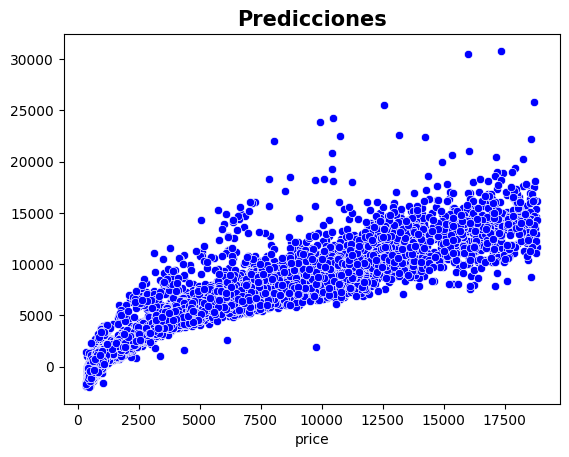

In [147]:
# Realiza predicciones
y_pred = linreg.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred, color="blue")
plt.title("Predicciones", fontsize=15, fontweight="bold");

In [148]:
# Guarda resultados
history = {"LinearRegression" : [linreg, linreg.score(X_test, y_test)]}

## DecisionTreeRegressor

In [149]:
# Creación del modelo
model_tree = DecisionTreeRegressor(random_state=29)
# Entrenamiento del modelo
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=29)

In [150]:
# Evaluación del modelo
print("R squared of the Decision Tree Regressor on training set: {:.2%}".format(model_tree.score(X_train, y_train)))
print("R squared of the Decision Tree Regressor on test set: {:.2%}".format(model_tree.score(X_test, y_test)))

R squared of the Decision Tree Regressor on training set: 99.99%
R squared of the Decision Tree Regressor on test set: 96.55%


In [151]:
# Interpretación en el negocio
print(interpretacion("Árbol de decisión", X_train.columns, model_tree.score(X_test, y_test)))

Modelo de regresión Árbol de decisión
   96.55% de la variabilidad en los precios de los diamantes se puede explicar utilizando las 7 características
   Características elegidas :['carat' 'cut' 'color' 'clarity' 'depth' 'table' 'vol'].




---


**Observaciones**



---


+ $R^{2}$ en el conjunto de entrenamiento es un poco más alta que $R^{2}$ en el conjunto de prueba, pero eso no significa que nuestro modelo de regresor del árbol de decisión esté sobreajustado. Por el contrario, nuestro modelo de regresor de árbol de decisión se está generalizando bien a nuevos datos.
+ El % de variabilidad explicada por las variables utilizadas es alto.
+ Esto es excelente.

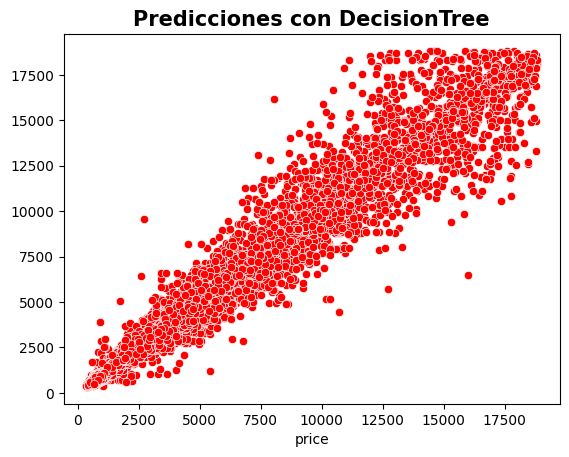

In [152]:
# Realiza predicciones
y_pred_tree = model_tree.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred_tree, color="red")
plt.title("Predicciones con DecisionTree", fontsize=15, fontweight="bold");

In [153]:
# Guarda resultados
history["DecisionTreeRegressor"] = [model_tree, model_tree.score(X_test, y_test)]

In [154]:
history

{'LinearRegression': [LinearRegression(), 0.8830440331783315],
 'DecisionTreeRegressor': [DecisionTreeRegressor(random_state=29),
  0.965531161979854]}

## RandomForestRegressor

In [155]:
# Creación del modelo
model_rf = RandomForestRegressor(n_estimators=100, random_state=29)
# Entrenamiento del modelo
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=29)

In [156]:
# Evaluación
print("R squared of the Random Forest Regressor on training set: {:.2%}".format(model_rf.score(X_train, y_train)))
print("R squared of the Random Forest Regressor on test set: {:.2%}".format(model_rf.score(X_test, y_test)))

R squared of the Random Forest Regressor on training set: 99.71%
R squared of the Random Forest Regressor on test set: 98.10%


In [157]:
# Interpretación en el negocio
print(interpretacion("RandomForest", X_train.columns, model_rf.score(X_test, y_test)))

Modelo de regresión RandomForest
   98.10% de la variabilidad en los precios de los diamantes se puede explicar utilizando las 7 características
   Características elegidas :['carat' 'cut' 'color' 'clarity' 'depth' 'table' 'vol'].




---

***OBSERVACIONES***

---

+ $R^{2}$ en el conjunto de entrenamiento es un poco más alta que $R^{2}$ en el conjunto de prueba, pero eso no significa que nuestro modelo de RandomForest aleatorio esté sobreajustado. Por el contrario, nuestro modelo de regresor de bosque aleatorio se está generalizando bien a nuevos datos.
+ Alto % de variabilidad explicada.
+ Esto es excelente.



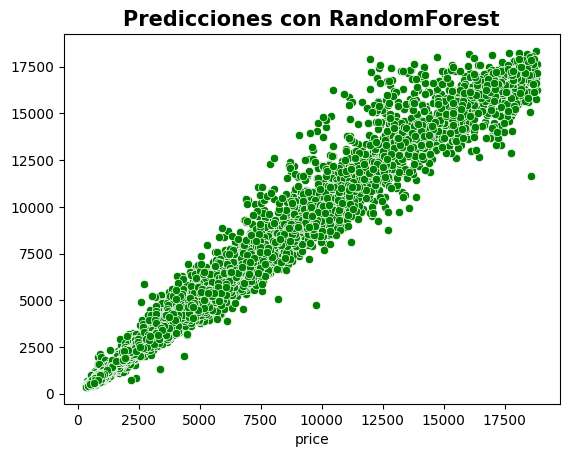

In [158]:
y_pred_rf = model_rf.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred_rf, color="green")
plt.title("Predicciones con RandomForest", fontsize=15, fontweight="bold");

In [159]:
# Guarda resultados
history["RandomForestRegressor"] = [model_rf, model_rf.score(X_test, y_test)]

# Fase 5 : Evaluación de modelos



In [180]:
def mae_interpretacion(modelo : str, value : float):
  print(f"El moodelo '{modelo}' pudo predecir el precio de cada diamante en el conjunto de prueba con un error de ± $ {value:.2f} del precio real.")

def msle_interpretacion(modelo : str, value : float):
  print(f"El modelo '{modelo}' pudo predecir el precio de cada diamante en el conjunto de prueba con un error de ± {value: .2%} del precio real.")

## LinearRegressor

In [161]:
# Evaluando el Modelo de Regresión Lineal
#
d = {"real": y_test, "prediccion": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["delta"] = df_lr["prediccion"]-df_lr["real"]
df_lr


,real,prediccion,delta
18445,7503,7894.147679,391.147679
19141,7904,9695.215942,1791.215942
845,2869,3645.559433,776.559433
50179,2222,3241.853741,1019.853741
50021,2196,2811.258030,615.258030
...,...,...,...
27780,648,-359.600858,-1007.600858
9582,4627,5768.631281,1141.631281
5087,3752,5191.057251,1439.057251
9986,4704,5419.026005,715.026005


In [162]:
print("Mean Absolute Error of the Linear Regression on test set is {:.2f}".format(mean_absolute_error(y_test, y_pred)))

Mean Absolute Error of the Linear Regression on test set is 879.01


In [163]:
mae_interpretacion("Regresión lineal", mean_absolute_error(y_test, y_pred))

El moodelo 'Regresión lineal' pudo predecir el precio de cada diamante en el conjunto de prueba con un error de ± $ 879.01 del precio real.


In [ ]:
# Las siguientes líneas muestran un error, pues dan un valor negativo!!!!
#

#print("Mean Squared Log Error of the Linear Regression on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred)))

***Este modelo en términos de producto es un mal producto porque no tiene sentido un precio negativo.***

## DecisionTreeRegressor

In [164]:
# Evaluando el Modelo de Árbol de Decisión de regresión
#
d = {"real": y_test, "prediccion": y_pred_tree}
df_dt = pd.DataFrame(data=d)
df_dt["delta"] = df_dt["prediccion"]-df_dt["real"]
df_dt


,real,prediccion,delta
18445,7503,5832.0,-1671.0
19141,7904,7763.0,-141.0
845,2869,2704.0,-165.0
50179,2222,2443.0,221.0
50021,2196,2196.0,0.0
...,...,...,...
27780,648,505.0,-143.0
9582,4627,4489.0,-138.0
5087,3752,4566.0,814.0
9986,4704,4620.0,-84.0


In [165]:
print("Mean Absolute Error of the Decision Tree Regressor on test set is {:.2f}".format(mean_absolute_error(y_test,y_pred_tree)))

Mean Absolute Error of the Decision Tree Regressor on test set is 362.47


In [166]:
mae_interpretacion("Árbol de decisión", mean_absolute_error(y_test, y_pred_tree))

El moodelo 'Árbol de decisión' pudo predecir el precio de cada diamante en el conjunto de prueba con un error de ± $ 362.47 del precio real.


In [167]:
print("Mean Squared Log Error of the Decision Tree Regressor on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred_tree)))

Mean Squared Log Error of the Decision Tree Regressor on test set is 2.16%


In [181]:
msle_interpretacion("Árbol de decisión", mean_squared_log_error(y_test,y_pred_tree))

El modelo 'Árbol de decisión' pudo predecir el precio de cada diamante en el conjunto de prueba con un error de ±  2.16% del precio real.


## RandomForest

In [169]:
# # Evaluando el Modelo de Bosque Aleatorio de árboles de decisión
#
d = {"real": y_test, "prediccion": y_pred_rf}
df_rf = pd.DataFrame(data=d)
df_rf["delta"] = df_rf["prediccion"]-df_rf["real"]
df_rf


,real,prediccion,delta
18445,7503,6632.690000,-870.310000
19141,7904,7796.948333,-107.051667
845,2869,3075.696667,206.696667
50179,2222,2242.650000,20.650000
50021,2196,2286.710000,90.710000
...,...,...,...
27780,648,571.646833,-76.353167
9582,4627,4753.500000,126.500000
5087,3752,4111.905000,359.905000
9986,4704,4628.041667,-75.958333


In [170]:
print("Mean Absolute Error of the Random Forest Regressor on test set is {:.2f}".format(mean_absolute_error(y_test,y_pred_rf)))

Mean Absolute Error of the Random Forest Regressor on test set is 281.39


In [171]:
print("Mean Squared Log Error of the Random Forest Regressor on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred_rf)))

Mean Squared Log Error of the Random Forest Regressor on test set is 1.24%


In [182]:
mae_interpretacion("RandomForest", mean_absolute_error(y_test, y_pred_rf))
msle_interpretacion("RandomForest", mean_squared_log_error(y_test,y_pred_rf))

El moodelo 'RandomForest' pudo predecir el precio de cada diamante en el conjunto de prueba con un error de ± $ 281.39 del precio real.
El modelo 'RandomForest' pudo predecir el precio de cada diamante en el conjunto de prueba con un error de ±  1.24% del precio real.


## Selección del mejor modelo

Se selecciona el mejor modelo en función de sus puntajes MAE y MSLE en test

In [183]:
def get_bestModel( history : dict):
  # Inicializar una variable para almacenar el mayor valor
  mayor_valor = float('-inf')

  # Recorrer el diccionario
  for modelo, data in history.items():
    # Comparar el segundo elemento de la lista (data[1] almacena el score) con el mayor encontrado hasta ahora
    if data[1] > mayor_valor:
        mayor_valor = data[1]
        best_model = data[0]

  return best_model, mayor_valor, modelo

In [184]:
best_model, best_score, name_model = get_bestModel(history)
print("El mejor rendimiento es: {0:.2%} y le corresponde a {1}".format(best_score, name_model))

El mejor rendimiento es: 98.10% y le corresponde a RandomForestRegressor


# Fase 6: Deployment

Ahora ya se tiene el mejor modelo: ¿cómo predecimos el precio de mercado de un nuevo diamante nuevo diamante?

Supongamos que hay un diamante nuevo que tiene (***considerando la alternativa 0 de codificación de las variables categóricas***)

+ quilate=0,23,
+ corte=5 (Ideal),
+ color=2 (E),
+ claridad=1 (SI2),
+ profundidad=61,5,
+ tabla=55,
+ volumen=38,20 (x=3,95, y=3,98 y z=2,43).

In [175]:
new_diamond = [0.23, 5, 2, 1, 61.5, 55, 38.20]
new_diamond

[0.23, 5, 2, 1, 61.5, 55, 38.2]

In [176]:
X_data = pd.DataFrame(np.array(new_diamond).reshape(1,-1), columns=X_train.columns)

In [177]:
X_data

,carat,cut,color,clarity,depth,table,vol
0,0.23,5.0,2.0,1.0,61.5,55.0,38.2


In [178]:
# Se toman estos nuevos datos y se usan para predecir el precio de mercado del nuevo diamante.
#
prediction = best_model.predict(X_data)[0]
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))

 The market price of this new diamond is $384.58


**Guardar el modelo finalizado en formato pickle nos ahorra mucho tiempo ya que no tenemos que entrenar nuestro modelo cada vez que ejecutamos la aplicación. Una vez que guardamos nuestro modelo como pickle, puede cargarlo más tarde mientras realiza la predicción.**

In [179]:
# Primero, se abre un nuevo archivo para almacenar el mejor modelo y poder llamarlo
file_model = open('fw_model', 'wb')
# Guarda en el archivo el mejor modelo
pickle.dump(best_model , file_model)
# Cerrar el archivo
file_model.close()

En un nuevo notebook deberíamos ejecutar:

```
import pickle
f2 = open('fw_model', 'rb')
model = pickle.load(f2)
# Predicción para la transacción anterior
model.predict([[0.23, 5, 2, 1, 61.5, 55, 38.20]])[0]
```

**Y el resultado de la predicción debería ser el mismo**
